# Part 1: Warm-Up

Recall the problem where we're throwing the ball up in the air, we got a graph the one below. Let's try to write an equation for the **FIRST** hump of the ball's trajectory. In general the height of a ball experiencing gravity has a trajectory of: 

$$h(t) = -\frac{1}{2} g t^2 + v_0 t + h_0$$

Where: 
- $g = 9.8$ is a constant that corresponds to Earth's gravity (or more accurately, the acceleration caused by Eath's gravity)
- $v_0$ is the initial velocity (meters/sec) -- like the speed the ball is thrown
- $h_0$ is the initial height (meters), how high the ball was to start.

What do you think $h_0$ was for the graph below? If $v_0$ was 15 m/s, can you write the formula used for the **FIRST** part of this ball's trajectory?



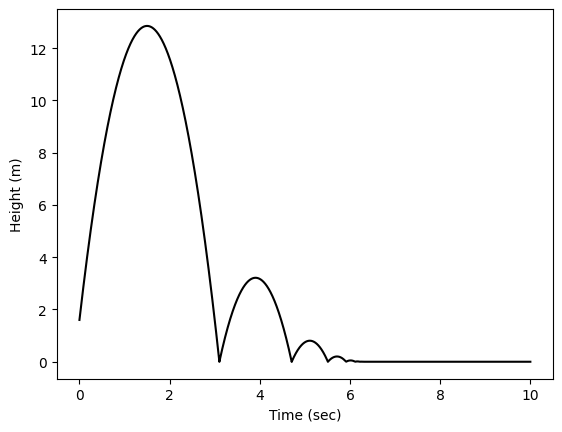

From the graph, it looks like the height of the ball at time 0 was about 1.6. So, $h_0 = 1.6$. Plugging this value into the equation we get: 
$$ h(t) = -4.6t^2 + 15t + 1.6 $$

In the bonus, if you have time we will return to this.

# Part 2: Making Plastic Kiddie Pools




Imagine your company makes plastic kiddie pools like the ones below. While they're not perfectly cyclindical, to simplify our calculations, we'll predent the pool is an "open top cyclinder" meaning a cylinder with the side and and bottom, but no top.

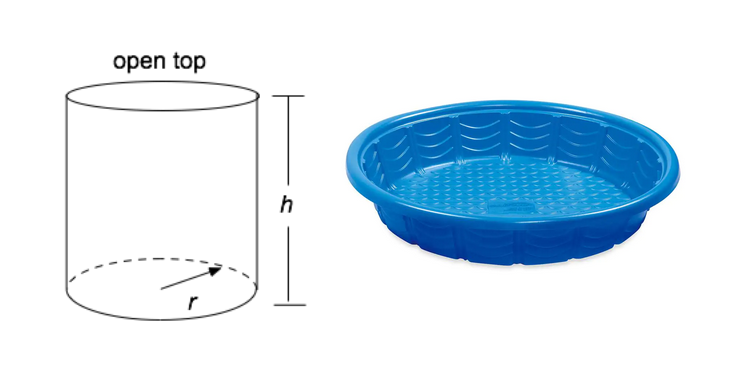

Image Sources: 
- https://www.homedepot.com/p/Summer-Waves-45-in-Round-7-9-in-Deep-Kiddie-Pool-P60000130/317025815
- https://www.matheno.com/calculus-1/optimization/least-expensive-open-topped-can/

You're tasked with determining the what size kiddie pools your company is going to make. There's a few things you want to consider, but the main things are the following: 
- How much plastic will be used and how much will that plastic cost?
- How many babies you can expect to fit into the kiddie pool

All of the kiddie pools have a **required 6 inch height** for safety reasons. So the only thing you'll be changing is the **radius**

To find the amount of plastic that's going to be used, we're going to calculate the **external** surface area of the pool. From there we'll be able to calculate the price. For, the surface area can be found as: 
$$SA(r) = \pi r^2 + 2\pi rh$$

And remember in our situation, $h$ is a constant 6. First, let's write a function `pool_SA` which takes one argument `r` and returns. 

Since we want our function to be able to take numpy arrays eventually, when you square `r` use the function `np.square`, as in the example below, which prints `25`. 

```
import numpy as np
x = 5
y = np.square(5)
print(y)
```

In [ ]:
print(3.14*36)

113.04


1. Write your function `pool_SA` which takes one argument `r` and returns the external surface area of the pool.

In [ ]:
from math import pi

# your code here
import numpy as np

def pool_SA(r):
  h = 6
  return pi*np.square(r) + 2*pi*r*h


Now, let's make a function for the number of babies. The number of babies you can fit in a swimming is only a function of the area of the base of the pool. Each baby needs 324$in^2$ of space. So, if the area of the base of the pool is 700$in^2$, only two babies can fit in that pool. 

2. Write a funciton `num_babies` which takes one argument `r` and returns the number of babies that can fit in the kiddy pool. 

*hint: you will likely need to use `//` to do your division. Remember the area of a circlue is $A(r) = \pi r^2$*

In [ ]:
from math import pi

# your code here
import numpy as np

def num_babies(r):
  space_per_baby = 324
  return pi*np.square(r) // space_per_baby


Now, let's make graphs of $SA$ versus $r$ and the number of babies versus $r$. Make graphs with $r$ ranging from 1 to 30 inches. 

Note that with numpy, we can make a numpy range like this: 
```
import numpy as np
my_range = np.arange(start, end+1, step)
```

For example, think about what the output of the following code will be. Then run it and see if you were correct.

In [ ]:
import numpy as np

x = np.arange(1, 4, 0.5)
y = np.square(x) + 3
print(x, y)

3. Okay make you graphs of $SA$ versus $r$ and the number of babies versus $r$. Make graphs with $r$ ranging from 1 to 30 inches with steps of 0.01 inches. 

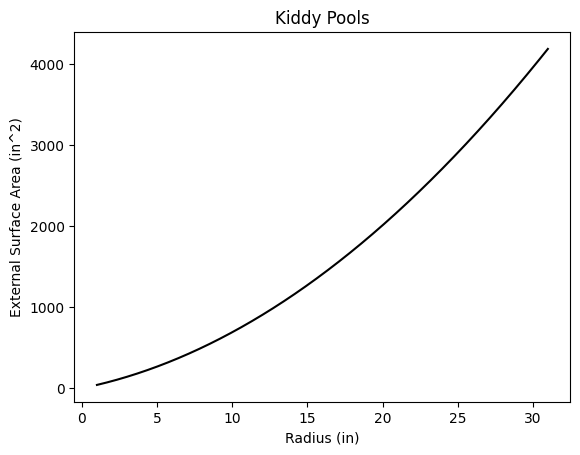

In [ ]:
from math import pi

# your code here
import numpy as np
import matplotlib.pyplot as plt

def pool_SA(r):
  h = 6
  return pi*np.square(r) + 2*pi*r*h

r = np.arange(1, 31, 0.01)
sa = pool_SA(r)

plt.plot(r, sa, c='k')

plt.title("Kiddy Pools")
plt.xlabel("Radius (in)")
plt.ylabel("External Surface Area (in^2)")


plt.show()

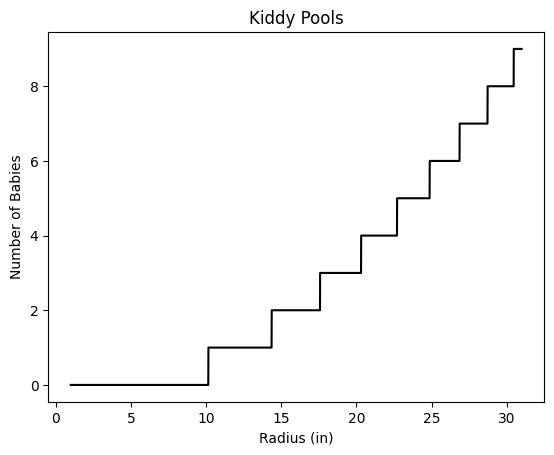

In [ ]:
from math import pi

# your code here
import numpy as np
import matplotlib.pyplot as plt

def num_babies(r):
  space_per_baby = 324
  return pi*np.square(r) // space_per_baby

def pool_SA(r):
  h = 6
  return pi*np.square(r) + 2*pi*r*h

r = np.arange(1, 31, 0.01)
sa = pool_SA(r)
babies = num_babies(r)

plt.plot(r, babies, c='k')

plt.title("Kiddy Pools")
plt.xlabel("Radius (in)")
plt.ylabel("Number of Babies")


plt.show()

Now, it's time to make a compelling visualization combining this information. Imagine the plastic costs about \$0.0025/$in^2$. 

4. Write a new function `plastic_cost` which takes one argument `r` and returns the cost of the plastic to make a kiddy pool with height 6 and radius `r`. 

In [ ]:
def plastic_cost(r):
  h = 6
  price_per_sqin = 0.0025
  sa = pi*np.square(r) + 2*pi*r*h
  return sa * price_per_sqin

Now, look at the graph for the kiddy pools. What do you notice? We have a "step" graph. This means that for various values of `r` we get the same number of babies until suddently, we reach a threshold and another baby can be added. Below is a function which takes two numpy arrays `x` and `y` and returns at what `x` values there is a "step" or a "jump" in `y`. 

5. Use this function to find and print the `r` values at which there are steps in the number of babies that you can fit in the kiddy pool. 

In [ ]:
from math import pi

def detect_steps(x, y):
  """
  Assuming that y corresponds to a function
  such that f(x) = y, it finds the x values for 
  which there is a step in y
  """

  steps = []
  for i in range(len(x)):
    # if this y value is different
    # from the pervious value
    # there there's a step
    if abs(y[i] - y[i-1]) > 0.001:
      steps.append(x[i])

  return steps

# your code here
import numpy as np
import matplotlib.pyplot as plt

def num_babies(r):
  space_per_baby = 324
  return pi*np.square(r) // space_per_baby

r = np.arange(1, 31, 0.01)
babies = num_babies(r)

steps = detect_steps(r, babies)

print("There are steps in the number of babies at the following radii:", steps)

There are steps in the number of babies at the following radii: [1.0, 10.160000000000007, 14.370000000000012, 17.590000000000014, 20.320000000000018, 22.71000000000002, 24.88000000000002, 26.870000000000022, 28.730000000000025, 30.470000000000027]


6. Now, time for the visualization. 
- Make a graph of pastic cost versus radius. 
- Add vertical lines at each of the values of `r` where you can add another baby to the kiddy pool
- Add label text to these lines

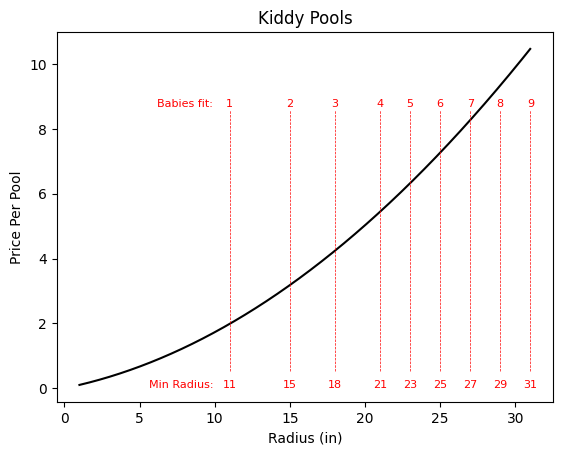

In [41]:
from math import pi, ceil
import numpy as np
import matplotlib.pyplot as plt

def plastic_cost(r):
  h = 6
  price_per_sqin = 0.0025
  sa = pi*np.square(r) + 2*pi*r*h
  return sa * price_per_sqin

def detect_steps(x, y):
  """
  Assuming that y corresponds to a function
  such that f(x) = y, it finds the x values for 
  which there is a step in y
  """

  steps = []
  for i in range(1, len(x)):
    # if this y value is different
    # from the pervious value
    # there there's a step
    if abs(y[i] - y[i-1]) > 0.001:
      steps.append(x[i])

  return steps

def num_babies(r):
  space_per_baby = 324
  return pi*np.square(r) // space_per_baby


r = np.arange(1, 31, 0.01)

babies = num_babies(r)
steps = detect_steps(r, babies)

costs = plastic_cost(r)

# We want the radii shown to be integer inches
# This is just a personal preference
steps = [ceil(s_) for s_ in steps]

# plot the r versus the costs
plt.plot(r, costs, c='k')

# for each one of the r 
for i in range(len(steps)):

  # make the line
  plt.plot([steps[i], steps[i]], [max(costs)*0.05, max(costs)*0.82], 
           linestyle='--', # dotted line
           lw=0.5, # 
           c='r')
  # put the number of babies at the top of the line
  plt.text(steps[i], max(costs)*0.83, i+1, 
           ha='center', # 
           color='r',
           fontsize=8)
  # put the radius at which it occurs at the bottom of the line
  plt.text(steps[i], 0, '%d'%steps[i], 
           ha='center',
           color='r',
           fontsize=8)
  
# add the labeling lines 
plt.text(steps[0]*0.9, max(costs)*0.83, "Babies fit:", 
           ha='right',
           color='r',
           fontsize=8)
plt.text(steps[0]*0.9, 0, "Min Radius:", 
           ha='right',
           color='r',
           fontsize=8)


plt.title('Kiddy Pools')
plt.xlabel('Radius (in)')
plt.ylabel('Price Per Pool')

plt.show()



What sizes would you make?

There are many ways to approach this question, all of which are okay as long as the student justifies their reasoning. One could be to make one each time you could add a new baby (make sizes 11in, 15in, 18in, 21in...). Another would be choose a few along the way, thinking about what would be the most popularly desired numbers, maybe opting for 2 babies (15in), 4 babies (21in) and 8 babies (29). We do see that the price gets much higher as we add more babies, so you might also choose to just include up to 4 babies. The cheaper the pools are to make, the more of them you can make and sell. 

# Bonus: Ball Graph

Recall that when in in the first part of the ball exercises from last class, the graph was actually of height versus horizontal distance. How would we write those equations? We don't have as of a way to do this.

This answer is that we *parameterize* the equations. In this case, *parameterization* means we're going to write both the height and horizontal distances as a function of *time* and then combine our answers.

Knowing this, we'll first make graphs of the height and the horizontal distance versus time. To do this you'll need the following bits of information. 


And if you want to square an entire array, you'll need this function
```
import numpy as np
x = np.arange(1, 5)
y = np.square(x)
```

For example, try to imagine what the output of this code will be, then run it and see if you were correct. 

In [ ]:
import numpy as np

x = np.arange(1, 4, 0.5)
y = np.square(x) + 3
print(x, y)

[1.  1.5 2.  2.5 3.  3.5] [ 4.    5.25  7.    9.25 12.   15.25]


1. Using this information: 
- make a numpy array `t` ranging from 0 to 3.99 with steps of 0.01
- make a numpy array `h` from the array `t`, corresponding to $h(t)$ from the warm-up
- graph `h` versus `t`

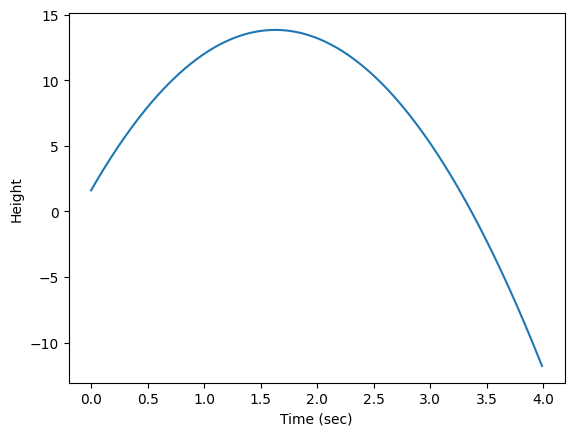

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 4, 0.01)
h = -4.6*np.square(t) + 15*t + 1.6

plt.plot(t, h, c='r')

plt.xlabel('Time (sec)')
plt.ylabel('Height')


plt.show()

Look at the graph above, do you see anything wrong with it? Notice how the height goes below zero? The ball has gone below the ground?? Sure the function tells us that, but we know that this means the . 

To achieve this, we're going to use the `np.where` function. Which can be this to filter an array based on a condition. Think about the code below. Can you guess what it will give? Guess then run the code.

In [ ]:
a = np.arange(10)
b = a[np.where(a > 5)]
print(a)
print(b)

[0 1 2 3 4 5 6 7 8 9]
[6 7 8 9]


It can also be used like this: 

In [ ]:
a = np.arange(10)
b = a + 100
c = b[np.where(a > 5)] # notice we're filtering based on a
print(a)
print(b)
print(c)

[0 1 2 3 4 5 6 7 8 9]
[100 101 102 103 104 105 106 107 108 109]
[106 107 108 109]


Using this information, filter `t` and `h` so that we get only the values where `h` is greater than 0. Graph the height again.

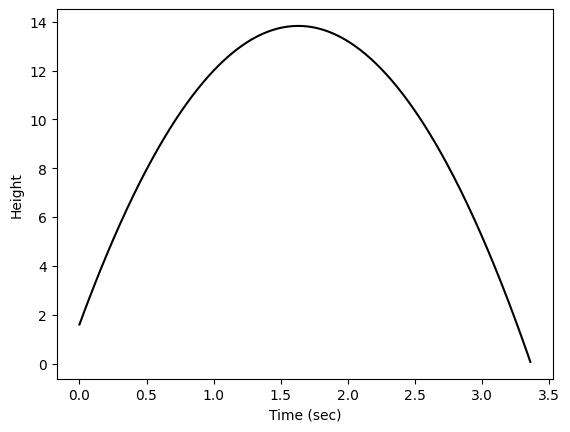

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 4, 0.01)
h = -4.6*np.square(t) + 15*t + 1.6

t = t[h > 0]
h = h[h > 0]

plt.plot(t, h, c='k')

plt.xlabel('Time (sec)')
plt.ylabel('Height')


plt.show()

Now, since there's no gravity acting horizontally (gravity pulls us **down**, not sidewise), the horizontal distance equation looks like this: 
$$x(t) = v_{x0}t$$
Where $v_{x0}$ is the initial **horizontal** velocity. 

If the initial horizontal velocity is 10 m/s:
- make a numpy array `t` ranging from 0 to 3.99 with steps of 0.01
- make a numpy array `x` from the array `t`, corresponding to $x(t)$ above
- graph `x` versus `t`



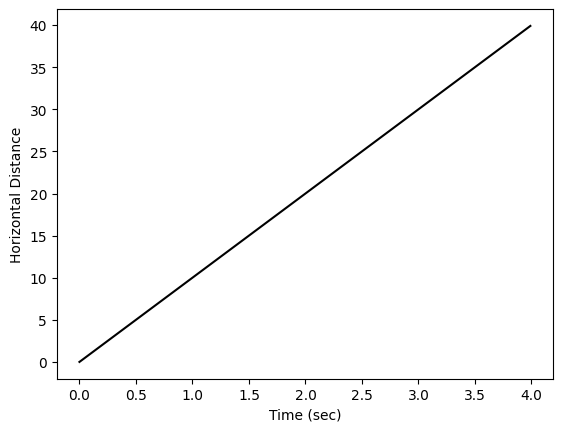

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 4, 0.01)
x = 10*t


plt.plot(t, x, c='k')

plt.xlabel('Time (sec)')
plt.ylabel('Horizontal Distance')


plt.show()

Finally, time to to combine it all. Below: 
If the initial horizontal velocity is 10 m/s:
- make a numpy array `t` ranging from 0 to 3.99 with steps of 0.01
- make a numpy array `x` from the array `t`, corresponding to $x(t)$ above
- make a numpy array `h` from the array `t`, corresponding to $h(t)$ from the warm-up
- filter `t`, `x`, and `h` to only have values when `h` is greater than or equal to 0 (above or on the ground)
- graph `h` versus `x`

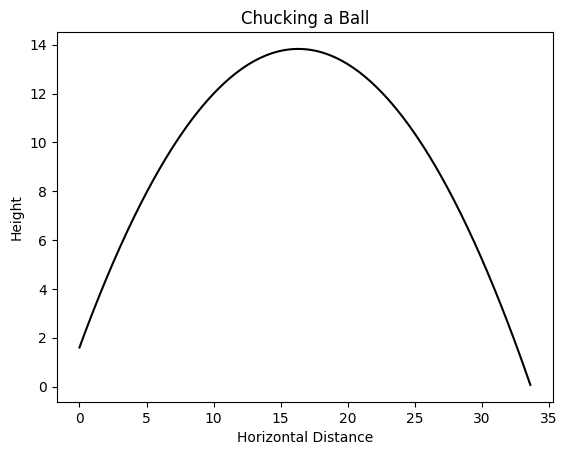

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 4, 0.01)
h = -4.6*np.square(t) + 15*t + 1.6
x = 10*t

t = t[h > 0]
x = x[h > 0]
h = h[h > 0]


plt.plot(x, h, c='k')

plt.xlabel('Horizontal Distance')
plt.ylabel('Height')
plt.title('Chucking a Ball')


plt.show()